Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106584
           1       1.00      1.00      1.00         4

    accuracy                           1.00    106588
   macro avg       1.00      1.00      1.00    106588
weighted avg       1.00      1.00      1.00    106588


Decision Tree Rules:
|--- BUKRS <= 1.50
|   |--- WRBTR <= 54423.25
|   |   |--- class: 0
|   |--- WRBTR >  54423.25
|   |   |--- WRBTR <= 54477.32
|   |   |   |--- BUKRS <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- BUKRS >  0.50
|   |   |   |   |--- DMBTR <= 1012174.81
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DMBTR >  1012174.81
|   |   |   |   |   |--- class: 0
|   |   |--- WRBTR >  54477.32
|   |   |   |--- class: 0
|--- BUKRS >  1.50
|   |--- WRBTR <= 54435.95
|   |   |--- class: 0
|   |--- WRBTR >  54435.95
|   |   |--- WRBTR <= 54436.95
|   |   |   |--- class: 1
|   |   |--- WRBTR >  54436.95
|   |   |   |--- cla

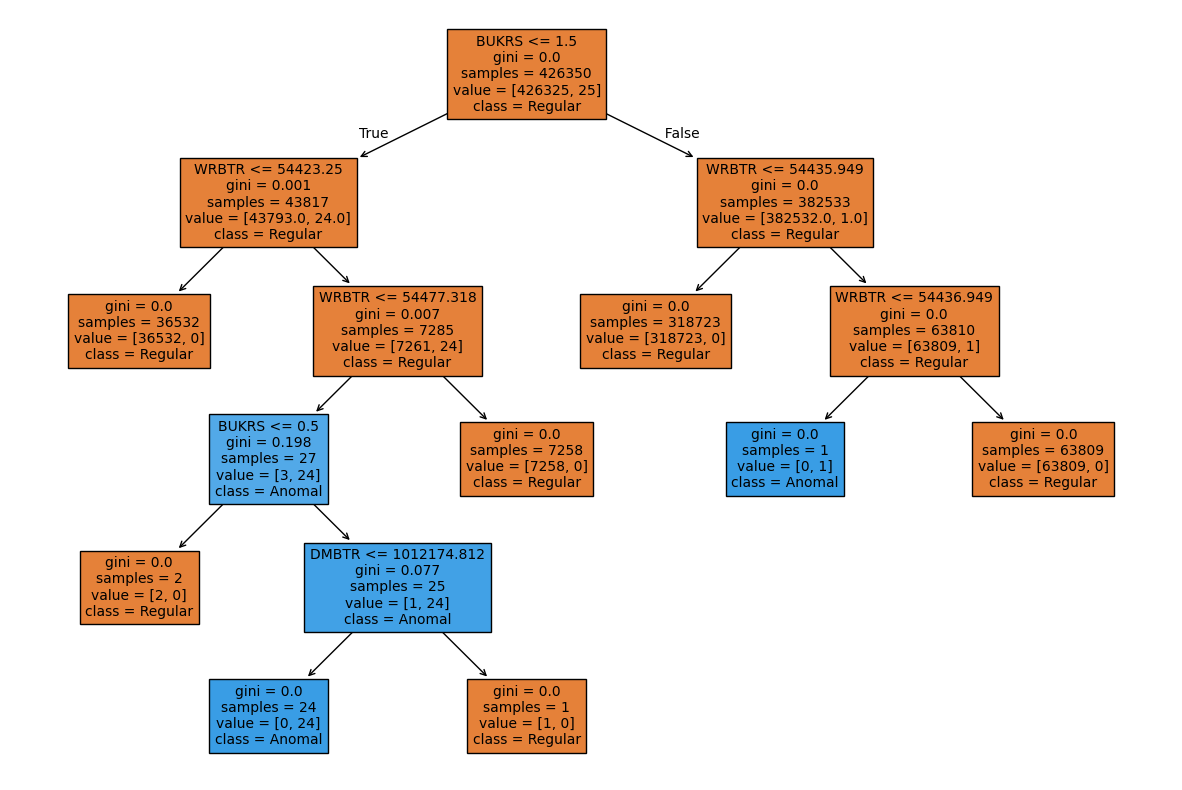

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from get_ids import get_ids_of_easy_outliers

#load data
df = pd.read_csv("data/datathon_data.csv")


# Drop BELNR (Account Document Number) since it's just an identifier
ids_to_remove = get_ids_of_easy_outliers(df)
df = df.drop(index = ids_to_remove, columns=['BELNR'])


# Identify categorical and numerical columns

categorical_cols = ['WAERS', 'BUKRS', 'KTOSL', 'PRCTR', 'BSCHL', 'HKONT']
numerical_cols = ['DMBTR', 'WRBTR']
target_col = 'label'

# Encode categorical variables using Label Encoding (since Decision Trees handle numeric values better)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories into numeric values
    label_encoders[col] = le  # Store encoder for later interpretation

# Convert target variable to binary (if it's not already)
df[target_col] = df[target_col].map({'regular': 0, 'anomal': 1})

# Define features and target
X = df.drop(columns=[target_col])  # Features (all columns except target)
y = df[target_col]  # Target variable (0 = regular, 1 = anomal)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = tree_clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Extract decision rules
print("\nDecision Tree Rules:")
tree_rules = export_text(tree_clf, feature_names=X.columns.tolist())
print(tree_rules)

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, feature_names=X.columns.tolist(), class_names=['Regular', 'Anomal'], filled=True, fontsize=10)
plt.show()


{'WAERS': LabelEncoder(),
 'BUKRS': LabelEncoder(),
 'KTOSL': LabelEncoder(),
 'PRCTR': LabelEncoder(),
 'BSCHL': LabelEncoder(),
 'HKONT': LabelEncoder()}